In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import time

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)
train_labels = train_dataset.pop('target')
test_labels = test_dataset.pop('target')

In [4]:
def norm(x, train_stats):
  return (x - train_stats['mean']) / train_stats['std']

In [5]:
train_stats = train_dataset.describe().T
train_stats

,count,mean,std,min,25%,50%,75%,max
age,242.0,54.128099,8.904992,34.0,48.0,54.5,60.75,77.0
sex,242.0,0.685950,0.465098,0.0,0.0,1.0,1.00,1.0
cp,242.0,0.962810,1.031989,0.0,0.0,1.0,2.00,3.0
trestbps,242.0,131.396694,17.352331,94.0,120.0,130.0,140.00,200.0
chol,242.0,247.181818,51.235037,126.0,212.0,241.5,274.00,564.0
fbs,242.0,0.144628,0.352454,0.0,0.0,0.0,0.00,1.0
restecg,242.0,0.528926,0.516522,0.0,0.0,1.0,1.00,2.0
thalach,242.0,149.797521,22.935873,71.0,134.5,153.0,167.75,195.0
exang,242.0,0.330579,0.471396,0.0,0.0,0.0,1.00,1.0
oldpeak,242.0,0.991322,1.162148,0.0,0.0,0.6,1.60,6.2


In [6]:
normed_train_data = norm(train_dataset, train_stats)
normed_test_data = norm(test_dataset, train_stats)

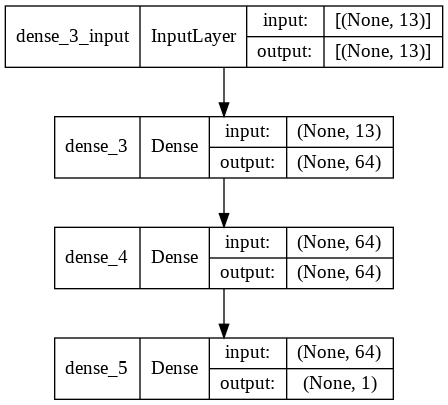

In [8]:
model = keras.Sequential([
             keras.layers.Dense(64, activation='relu', input_shape=[normed_train_data.shape[1]]),
             keras.layers.Dense(64, activation='relu'),
             keras.layers.Dense(1)             
])
keras.utils.plot_model(model, show_shapes=True)

In [9]:
optimizer = keras.optimizers.RMSprop(0.001)
model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mse', 'mae'])
model.fit(normed_train_data, train_labels, epochs=10)

Epoch 1/10
8/8 [==============================] - 1s 4ms/step - loss: 0.2520 - mse: 0.2520 - mae: 0.4215
Epoch 2/10
8/8 [==============================] - 0s 3ms/step - loss: 0.1502 - mse: 0.1502 - mae: 0.3075
Epoch 3/10
8/8 [==============================] - 0s 3ms/step - loss: 0.1249 - mse: 0.1249 - mae: 0.2775
Epoch 4/10
8/8 [==============================] - 0s 5ms/step - loss: 0.1136 - mse: 0.1136 - mae: 0.2597
Epoch 5/10
8/8 [==============================] - 0s 3ms/step - loss: 0.1020 - mse: 0.1020 - mae: 0.2506
Epoch 6/10
8/8 [==============================] - 0s 3ms/step - loss: 0.0918 - mse: 0.0918 - mae: 0.2338
Epoch 7/10
8/8 [==============================] - 0s 4ms/step - loss: 0.0836 - mse: 0.0836 - mae: 0.2209
Epoch 8/10
8/8 [==============================] - 0s 3ms/step - loss: 0.0779 - mse: 0.0779 - mae: 0.2150
Epoch 9/10
8/8 [==============================] - 0s 3ms/step - loss: 0.0719 - mse: 0.0719 - mae: 0.2043
Epoch 10/10
8/8 [==============================] - 0s 3

In [10]:
model.evaluate(normed_test_data, test_labels)

2/2 [==============================] - 0s 9ms/step - loss: 0.1454 - mse: 0.1454 - mae: 0.2859


[0.14537964761257172, 0.14537964761257172, 0.28594619035720825]

In [11]:
# create TF Dataset instead of directly passing numpy arrays into the model
dataset = tf.data.Dataset.from_tensor_slices(
    (normed_train_data.values, train_labels.values)
).batch(100)

In [12]:
model = keras.Sequential([
             keras.layers.Dense(64, activation='relu', input_shape=[normed_train_data.shape[1]]),
             keras.layers.Dense(64, activation='relu'),
             keras.layers.Dense(1)             
])
optimizer = keras.optimizers.RMSprop(0.001)
model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mse', 'mae'])
model.fit(dataset, epochs=10)

Epoch 1/10
3/3 [==============================] - 1s 5ms/step - loss: 0.4824 - mse: 0.4824 - mae: 0.6246
Epoch 2/10
3/3 [==============================] - 0s 5ms/step - loss: 0.2468 - mse: 0.2468 - mae: 0.4464
Epoch 3/10
3/3 [==============================] - 0s 5ms/step - loss: 0.1926 - mse: 0.1926 - mae: 0.3763
Epoch 4/10
3/3 [==============================] - 0s 5ms/step - loss: 0.1677 - mse: 0.1677 - mae: 0.3397
Epoch 5/10
3/3 [==============================] - 0s 5ms/step - loss: 0.1520 - mse: 0.1520 - mae: 0.3185
Epoch 6/10
3/3 [==============================] - 0s 5ms/step - loss: 0.1405 - mse: 0.1405 - mae: 0.3038
Epoch 7/10
3/3 [==============================] - 0s 5ms/step - loss: 0.1313 - mse: 0.1313 - mae: 0.2919
Epoch 8/10
3/3 [==============================] - 0s 5ms/step - loss: 0.1236 - mse: 0.1236 - mae: 0.2826
Epoch 9/10
3/3 [==============================] - 0s 4ms/step - loss: 0.1170 - mse: 0.1170 - mae: 0.2742
Epoch 10/10
3/3 [==============================] - 0s 4

In [13]:
# Prefetch - fetching the data before the model needs it to reduce time in getting data
dataset = tf.data.Dataset.from_tensor_slices(
    (normed_train_data.values, train_labels.values)
).batch(100).prefetch(buffer_size=2) # Buffer size specifies number of batches to prefetch

model = keras.Sequential([
             keras.layers.Dense(64, activation='relu', input_shape=[normed_train_data.shape[1]]),
             keras.layers.Dense(64, activation='relu'),
             keras.layers.Dense(1)             
])
optimizer = keras.optimizers.RMSprop(0.001)
model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mse', 'mae'])
model.fit(dataset, epochs=10)

Epoch 1/10
3/3 [==============================] - 1s 6ms/step - loss: 0.9990 - mse: 0.9990 - mae: 0.8518
Epoch 2/10
3/3 [==============================] - 0s 5ms/step - loss: 0.3370 - mse: 0.3370 - mae: 0.4591
Epoch 3/10
3/3 [==============================] - 0s 5ms/step - loss: 0.2249 - mse: 0.2249 - mae: 0.3846
Epoch 4/10
3/3 [==============================] - 0s 4ms/step - loss: 0.1853 - mse: 0.1853 - mae: 0.3510
Epoch 5/10
3/3 [==============================] - 0s 6ms/step - loss: 0.1647 - mse: 0.1647 - mae: 0.3297
Epoch 6/10
3/3 [==============================] - 0s 7ms/step - loss: 0.1513 - mse: 0.1513 - mae: 0.3140
Epoch 7/10
3/3 [==============================] - 0s 7ms/step - loss: 0.1411 - mse: 0.1411 - mae: 0.3017
Epoch 8/10
3/3 [==============================] - 0s 6ms/step - loss: 0.1327 - mse: 0.1327 - mae: 0.2908
Epoch 9/10
3/3 [==============================] - 0s 6ms/step - loss: 0.1255 - mse: 0.1255 - mae: 0.2808
Epoch 10/10
3/3 [==============================] - 0s 6

# Parallel Processing
<ins>Time-to-first-byte</ins>: Reading the first byte of data from a remote storage location can take orders of magnitude longer than from local storage

<ins>Read throughput</ins>: Remote storage can offer large bandwidth but reading a single file might only be able to use a fraction of this bandwidth.

Parallel processing cna improve both these metrics.

<ins>**Interleave**</ins>: Tensorflow transformation used to parallelize the data loading step. Can specify the number of datasets to overlap (the interleaving), and the level of parallelism.